<a href="https://colab.research.google.com/github/sherlywinbongalon/Fashion-Review-Analyzer/blob/main/ELECTIVE_MCO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  MINI DATA CHALLENGE – SENTIMENT ANALYSIS PROJECT


In [ ]:
# Importing Library Imports
# Installing necessary libraries

!pip install nltk textblob wordcloud

import pandas as pd
import nltk
import re  # For regular expressions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from textblob import TextBlob

# Download NLTK resources for Text Processing (NLP)
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

###  INTRODUCTION & DATASET FAMILIARIZATION



In [ ]:
# Initial Dataset Exploration
# Dataset size: 600
# Dataset type: Text-based customer reviews
# Dataset purpose: For text preprocessing to train and test sentiment model

''' Load your dataset (assuming it's a CSV named 'reviews.csv' with 'text'
and 'sentiment' columns)'''
data = {
  'text': [
            # 200 Positive Customer Reviews
            "This is the best online clothing store! My order arrived in two days and the quality is outstanding. The dress fits like it was made for me.",
            "I am absolutely in love with the sweater I bought. It is so soft and the color is even more beautiful in person. 10/10 will shop here again!",
            "Five stars! The customer service team was incredibly helpful when I needed to exchange a size. The process was fast and so easy. Highly recommend.",
            "Wow! The quality for the price is just unbeatable. I bought a pair of jeans and they are my new favorite. So comfortable and stylish.",
            "My package arrived beautifully wrapped and the items inside were perfect. You can tell they really care about the details. A fantastic shopping experience.",
            "I was hesitant to order shoes online, but these boots are perfect. They are true to size, comfortable right out of the box, and look amazing.",
            "This shop has the best selection of unique pieces. I always find something I love that I can't find anywhere else. Plus, shipping is always quick.",
            "The linen shirt I purchased is a dream. It's lightweight, breathable, and the craftsmanship is top-notch. Worth every penny.",
            "I'm obsessed with the jacket I got. It's the perfect transitional piece for fall. The fit is incredibly flattering and it feels very high-end.",
            "Finally, a store with accurate sizing charts! Everything I ordered fit perfectly. I am so happy and will be a returning customer for sure.",
            "The t-shirts are so soft and durable. They wash really well without losing their shape or color. A high-quality basic that everyone needs.",
            "I bought a dress for a wedding and received so many compliments. It was stunning and made me feel so confident. Thank you!",
            "This is my go-to store for workwear. The blouses are professional, stylish, and comfortable enough for all-day wear.",
            "The sale section is amazing! I got three high-quality items for the price of one. Such a great deal.",
            "The website is so easy to navigate and the photos are very accurate. What you see is exactly what you get. A trustworthy shop.",
            "I love the sustainable and ethical focus of this brand. It feels good to buy clothes from a company that aligns with my values.",
            "The coat I bought is so warm and cozy, but still lightweight. It's perfect for winter. I'm extremely satisfied with my purchase.",
            "Their loyalty program is actually worth it. I just got a huge discount on my latest order. It pays to be a repeat customer!",
            "The activewear is fantastic. The leggings are squat-proof and the sports bra is supportive but comfortable. Great for my workouts.",
            "I love the packaging! It was all recyclable and minimal, but still protected the clothes perfectly. Great job on the sustainability front.",
            "The swimsuit fits perfectly and is so flattering. The material is thick and feels very premium. I can't wait to wear it on vacation.",
            "This store never disappoints. Consistent quality, fast shipping, and on-trend styles. It's my favorite place to shop online.",
            "The leather belt I ordered is beautiful. You can smell the genuine leather and the hardware is heavy and solid. A truly quality accessory.",
            "I had an issue with a discount code and the online chat support fixed it for me in seconds. Wonderful, efficient service!",
            "The fit of these pants is incredible. As a tall person, it's hard to find pants long enough, but these are perfect. So, so happy!",
            "The material of this dress is amazing. It doesn't wrinkle at all, which is perfect for travelling. I'm going to buy it in more colors.",
            "This is the only place I buy my jeans from now on. The fit is consistent across all styles and they last forever.",
            "My order was shipped within an hour of me placing it. I've never seen such fast processing. Incredible!",
            "The blouse is gorgeous. The embroidered details are so intricate and well-done. It looks much more expensive than it was.",
            "The 'new arrivals' section is always exciting. This store is on top of the latest trends, and the pieces are wearable and well-made.",
            "The silk scarf is luxurious. The print is vibrant and the silk is so soft. It was the perfect gift.",
            "I appreciate that the models on the website are diverse in body type. It really helped me visualize how the clothes would fit me.",
            "The quality of the stitching and seams on my blazer is immaculate. This is a garment that is clearly built to last.",
            "This hoodie is the definition of comfort. I've been living in it since it arrived. The fleece lining is so soft.",
            "A perfect shopping experience from start to finish. Easy ordering, fast shipping, beautiful product. What more could you ask for?",
            "The colours in the collection are just stunning. I bought a mustard yellow cardigan and it brightens up my whole wardrobe.",
            "This store has the best basics. The tank tops and t-shirts are perfect for layering and hold up so well.",
            "I took a risk on a 'final sale' item and it paid off! The skirt is perfect and I got it for an absolute steal.",
            "The return policy is so fair and easy. I bought two sizes to try and returning the one that didn't fit was completely hassle-free.",
            "I'm a customer for life. This store just gets it right every single time. Quality, style, and service are always on point.",
            "The tote bag I bought is spacious, stylish, and sturdy. I carry it every day and people keep asking where I got it.",
            "I finally found my favourite pair of leggings. They hug in all the right places and don’t roll down during my workout.",
            "The summer dress I ordered has held up great. The colours didn’t fade despite constant wear and washing. Impressed!",
            "The knit pullover is unexpectedly warm despite being lightweight. Great for layering without feeling bulky.",
            "Ordering from overseas was seamless — customs were clearly explained, shipping was tracked, and the package arrived early.",
            "The denim jacket is classic yet modern. I get compliments every time I wear it and it goes with absolutely everything.",
            "The rings of hardware on the bag are solid and shiny, the leather strap feels premium. This company knows accessories.",
            "Customer support actually followed up after delivery to check if I was satisfied. That level of care is rare.",
            "The print on the blouse came out exactly as pictured; no weird colour shifts or unexpected texture. So glad!",
            "I'm very petite and often struggle with fit — this store’s petite line fits me like it was made for me. A huge win.",
            "The shorts I bought for vacation were ideal — cute, comfortable, they packed well and travelled great.",
            "The maxi dress flows beautifully, the material feels luxe, and the waistline is flattering. I feel confident wearing it.",
            "I admire that this brand offers extended sizing easily and without drama. The inclusive sizing makes shopping fun again.",
            "The sandals I got are stylish yet comfortable enough to walk in all day — rare find. I highly recommend these.",
            "I ordered a statement coat and it arrived looking exactly like the photos. The fit is spot on and it’s become my favourite outerwear piece.",
            "The collection colours reflect current trends but still feel timeless. I found pieces I’ll keep wearing next season too.",
            "I’m so impressed by how seamless the live chat was — I got an answer instantly about sizing and ordered without worry.",
            "I bought a ribbed knit dress and it holds its shape beautifully even after many wears and washes. Love it!",
            "The jewellery I ordered arrived with a little polishing cloth and everything — thoughtful touches like that make a difference.",
            "The travel blazer I got is wrinkle-resistant and fits perfectly into my carry-on. Ideal for work trips.",
            "I found a vintage-inspired piece here that nobody else in my circle had — I get compliments every time. Love discovering this brand.",
            "The fabric weight on the winter parka is premium — warm yet not bulky. I live in it when it gets cold.",
            "The return shipping label was included for free and that made me trust the brand even more. Great transparency.",
            "I love that this store clearly states which factories they work with and shows behind-the-scenes. Feels like a brand I can believe in.",
            "The fit and flare dress I ordered accentuates my shape perfectly without being clingy. One of the best fits I’ve had online.",
            "The baby pink blazer I bought looks like something I’d expect to see in a boutique twice the price. Incredible value.",
            "This store truly listens to customers — I suggested a colour and they released it within months. That responsiveness is amazing.",
            "I bought a hoodie for my husband as a gift, and he said it's “the softest hoodie ever.” Now we both shop here.",
            "The boots arrived with a handwritten thank-you note and the leather smell still makes me smile. Small touches add huge value.",
            "The linen trousers I ordered were cut beautifully, travel friendly, and didn’t wrinkle on the plane. A solid find.",
            "Everything from checkout to delivery to packaging feels premium. I’m impressed at how this store treats the customer.",
            "I discovered a new brand through this site and I already recommended it to three friends. That’s how good it is.",
            "My daughter’s dress arrived early, exactly as advertised, and she loved it. A shopper happy with the whole family experience!",
            "The colour-matching tool on the website helped me pick the right shade and it looked exactly like it when it arrived. That accuracy made me confident.",
            "The wool-blend coat fit perfectly over my blazer, yet still looked sleek and tailored. Great layering piece.",
            "I don’t often write reviews but I had to for this one — top notch all around. You’re doing it right!",
            "The sneakers I got are comfortable, stylish and I’ve had zero break-in issues. They look new even after weeks of wear.",
            "This brand knows how to do “affordable luxury”. I feel like I’ve upgraded my wardrobe without breaking the bank.",
            "The cropped blazer I purchased fits like a glove and the sleeves hit perfectly at my wrist — no alterations needed.",
            "The swimwear held up beautifully all summer; no sagging, no fading, no regrets. I’ll be back next year for more.",
            "I picked up a faux-fur coat on sale and it looks and feels real — styling it has become a treat. Highly pleased.",
            "The travel bag that came as part of the bundle is well made, zipped smoothly, and feels far superior to other “free gifts” I’ve seen.",
            "The quality control seems great — every piece I’ve received has been flawless. That consistency is rare and appreciated.",
            "I finally found a bra that fits, looks chic and doesn’t pinch. My search is over thanks to this store.",
            "This top is now my go-to layering piece — the neckline, the length, the fit; perfectly thought out. Well done.",
            "My order of three items arrived in one package, no mess of multiple shipments. That simple convenience means a lot.",
            "The matte finish hardware on the handbag looks designer-level and the stitching is neat and even. I’m seriously impressed.",
            "I got a complimentary accessory with my order, and it was actually useful and high quality. Such a nice surprise!",
            "The online size quiz was spot on. Everything fits perfectly based on my answers.",
            "I love how often they refresh their collections. There’s always something new to look forward to.",
            "The colours stayed vibrant even after multiple washes. That’s a sign of real quality.",
            "The brand’s social media is inspiring, and the products live up to the hype.",
            "I was nervous to buy a blazer online but it fits like it was tailored. Couldn’t be happier.",
            "I got free express shipping for signing up for their newsletter and my order came in 24 hours. Amazing deal.",
            "I was surprised by how fast the delivery was—came earlier than expected!",
            "The fabric feels so premium, honestly better than what I paid for.",
            "Sizing was spot on, and the color didn’t fade after washing. Love it!",
            "Customer service was super helpful when I had a question about my order.",
            "The jacket I bought is now my favorite piece in my closet.",
            "I’ve ordered multiple times already, and every experience has been smooth.",
            "Super satisfied! The fabric is soft and breathable, perfect for everyday wear. It looks exactly like the picture. I’ll definitely order again soon!",
            "I was surprised by the quality! The stitching is neat, and it fits me perfectly. Fast shipping too — received it earlier than expected!",
            "I love it! The color didn’t fade after washing, and it’s comfortable to wear the whole day. Highly recommended shop 💖",
            "Nice quality for the price. It’s not too thin and not too thick — just right. I got lots of compliments when I wore it!",
            "This is my second purchase and still very satisfied. Seller is responsive, packaging was neat, and item smells clean.",
            "Great product! I was worried it wouldn’t fit, but it’s true to size. The fabric feels premium and doesn’t wrinkle easily.",
            "Worth the money! Looks elegant and stylish. Just a bit loose on me, but nothing a small adjustment can’t fix.",
            "Everything about this item is perfect! From the design to the comfort — exceeded my expectations. Will recommend to my friends!",
            "I like it! It’s comfy and the size guide was accurate. Shipping took a few days but still okay considering the quality.",
            "The best purchase I’ve made this month! Material is cool and light, ideal for hot weather. Thank you, seller!",
            "Quality is superb for the price! The packaging was also nice and secure. Definitely buying again!",
            "It looks amazing! The colors are vibrant and the fabric feels high-end. Exactly as described.",
            "Super comfy and fits really well. I wore it the whole day and didn’t feel hot at all!",
            "I’ve ordered from this shop multiple times and they never disappoint. Consistent quality and fast delivery.",
            "Arrived early! It looks even better in person. The material is smooth and stretchable.",
            "Really impressed! I didn’t expect it to look this good. True to size and flattering fit.",
            "Beautiful piece! Perfect for casual and semi-formal occasions. Love the minimalist style.",
            "Thank you for the freebie! The shirt feels soft and premium. Highly recommended seller!",
            "The material is thick and comfy, feels durable. Definitely exceeded my expectations.",
            "Perfect fit, fast shipping, and great quality. One of my favorite online purchases so far!",
            "My New Go-To Store! Absolutely in love with this shop! The quality of the linen trousers I bought is exceptional.",
            "Perfect Fit and Style. I finally found a place that carries jeans that actually fit my body type! The staff was so helpful.",
            "Amazing Quality & Fair Prices. I'm so impressed. The fabrics feel high-end, but the prices are very reasonable.",
            "Great for Unique Finds. This isn't your average high-street store. I always find unique pieces here that I don't see anyone else wearing.",
            "Stellar Customer Service. Had an issue with a sizing online, and the customer service team was incredibly kind and resolved it immediately.",
            "Clothes That Last. I've had a blazer from here for over two years, and it still looks brand new. The stitching and material are clearly made to last.",
            "Wonderful In-Store Experience. The store is beautifully laid out and easy to shop in. The music is pleasant, and the staff are present but not pushy.",
            "Perfect Gift Destination. Bought a beautiful silk scarf for my mom, and she adored it. The gift wrapping was a lovely, free touch.",
            "Fast Shipping! I ordered a dress for a last-minute event, and it arrived in two days! It was perfectly packaged and exactly as described.",
            "Inclusive Sizing. It's so refreshing to find a stylish store that carries a wide range of sizes. I found gorgeous clothes that actually fit.",
            "Trendy and Fashion-Forward. Their collections are always on point with the latest trends, but in a wearable way. I get compliments every time I wear their pieces.",
            "Comfort is Key. Finally, a brand that doesn't sacrifice comfort for style. Their clothes are soft, move with you, and feel great all day.",
            "Ethical and Transparent. I love that they are committed to sustainable practices and ethical manufacturing. It makes me feel good about my purchase.",
            "Loyalty Program is Worth It. The points and rewards system is fantastic. I've earned several discounts and early access to sales.",
            "Perfect for Workwear. Found my entire new work wardrobe here. The blouses and trousers are professional, polished, and incredibly comfortable.",
            "Great Sales and Discounts. The seasonal sales are amazing! I've snagged some incredible deals on high-quality items.",
            "They Nailed the Basics. Their basic t-shirts and tanks are the best I've ever owned. Thick material, doesn't shrink, and holds its shape.",
            "Attention to Detail. You can tell the designers care. The little details like unique buttons or perfectly placed seams make all the difference.",
            "Easy and Intuitive Website. Shopping online was a breeze. The filters worked perfectly, and the product recommendations were spot-on.",
            "Always Finding Something New. I pop in every few weeks and there's always new stock. It keeps me coming back!",
            "Perfect for All Seasons. Their winter coats are incredibly warm, and their summer dresses are light and breezy. A truly versatile shop.",
            "My Happy Place. Shopping here is a genuine joy. The environment is so positive and uplifting.",
            "Clothes Make Me Feel Confident. The cuts are so flattering. I always feel my best when I'm wearing something from this store.",
            "Accurate Color Representation. The colors online are exactly what you receive. No unpleasant surprises!",
            "Packaging is Eco-Conscious. My order arrived in recycled packaging, which I really appreciate. It shows they care about their footprint.",
            "Activewear that Actually Works. Their yoga pants are supportive, opaque, and super stylish. I live in them.",
            "Fantastic for All Ages. I shop here for myself, and my mom shops here for herself. We both always find things we love.",
            "They Remember Their Customers. The staff remembered my name and my style preferences on my second visit. Such a personal touch!",
            "No Pilling on Sweaters. Even after multiple wears and washes, my sweaters from here look brand new. No fuzz in sight!",
            "A Community Feel. They host little events in the store sometimes. It feels more like a community hub than just a shop.",
            "Absolutely love this store! The staff was incredibly friendly and helped me find the perfect outfit.",
            "Amazing quality and such unique styles. I always get compliments on clothes I buy here.",
            "Great prices for the quality you get. I found so many amazing deals!",
            "The selection is fantastic. They have everything from casual basics to trendy statement pieces.",
            "My new favorite shop! The atmosphere is so welcoming and the displays are beautiful.",
            "The sales associate who helped me went above and beyond. Excellent customer service!",
            "I had to make a return and the process was surprisingly smooth and easy.",
            "The fitting rooms are clean, spacious, and have great lighting.",
            "Finally found a store where the sizing is consistent and accurate.",
            "The fabrics feel so high-quality and durable. These clothes are made to last.",
            "Checkout was super fast, even on a busy Saturday.",
            "I always find hidden gems here. It's my go-to for special occasions.",
            "The store is so well-organized and clean, making it easy to browse.",
            "They have a great loyalty program. I feel like my business is actually valued.",
            "The styles are always on-trend but still wearable.",
            "I bought a dress for a wedding and it fit like a glove. No alterations needed!",
            "The music and general vibe in the store make shopping so much more enjoyable.",
            "They have an excellent range of sizes, which I really appreciate.",
            "The accessories selection is top-notch. I found the perfect bag to match my shoes.",
            "Will 100% be back. I can't recommend this place enough!",
            "The quality is better than I expected! The fabric feels soft and comfy.",
            "Fits perfectly! I’m 5’5” and medium size is just right.",
            "Fast delivery and well-packed. Will definitely order again!",
            "Love how the color matches exactly what’s in the photo.",
            "The seller was very responsive and helpful. Highly recommend!",
            "I’ve washed it twice and it still looks new. Great quality.",
            "My new favorite shirt! Stylish and affordable.",
            "The fabric is thick and not see-through at all.",
            "Worth every peso! It looks premium.",
            "Arrived earlier than expected. Thank you seller!",
            "The size guide is accurate. I ordered large and it fits perfectly.",
            "My friends asked where I got this — super nice!",
            "Looks just like the picture, no false advertising.",
            "Great deal for the price! I’m surprised at how nice it looks.",
            "Super comfy for daily wear.",
            "I bought this for my sister and she loves it!",
            "Smooth transaction, item arrived in good condition.",
            "The stitching is neat and well-made.",
            "Definitely ordering more colors!",
            "Perfect for casual and office wear.",
            "The fabric feels breathable even in hot weather.",
            "Came with freebie — thank you seller!",
            "Color doesn’t fade after washing.",
            "I didn’t expect it to look this good in person.",
            "Feels high quality and elegant when worn.",
            "I’m impressed! Looks like something from a boutique.",
            "Seller updated me every step of the way.",
            "No weird smell, clean and well-packed.",
            "Bought one for my mom, and now she wants another.",
            "I’m super happy with my purchase! Highly recommended shop.",

            # 200 Negative Customer Reviews
            "This is the worst store I have ever shopped at. My order is a month late and customer service keeps ignoring my emails.",
            "The quality is absolutely terrible. The 'sweater' is a thin, scratchy piece of polyester that looks nothing like the photo. Complete scam.",
            "I received the wrong item and now they are telling me the item I actually ordered is out of stock. So frustrating! Never ordering again.",
            "Do not buy from here! The sizing is a joke. I ordered an 'L' and it fits like an 'XS'. I can't even get it on. What a waste of money.",
            "I tried to return an item that was clearly defective (it arrived with a hole!) and they are refusing to refund my money. This is theft.",
            "The shipping cost is outrageous, and it still took three weeks to arrive. The box was crushed and the item inside was wrinkled beyond belief.",
            "The color of the dress in person is a hideous, dull brown. The photo online showed a vibrant chestnut. This is false advertising.",
            "After one single wash (following the instructions!), the shirt shrank two sizes and all the color bled out. It's completely unwearable.",
            "The 'leather' bag smells like toxic chemicals and plastic. It's clearly cheap pleather. I am so disappointed and feel totally ripped off.",
            "I'm still waiting for a refund for a return I sent back over a month ago. Their customer service just says 'it's processing.' Unacceptable.",
            "The button fell off my coat the second time I wore it. The stitching is coming undone everywhere. This is fast fashion at its worst.",
            "This company floods my inbox with spam emails, but when I actually need help with an order, they are nowhere to be found. Terrible priorities.",
            "The fit is so awkward. The waist is tiny but the hips are huge, and the material has zero stretch. It's designed for a mannequin, not a person.",
            "I paid extra for express shipping and my package still hasn't even been sent out a week later. I needed this for an event. So angry.",
            "The website is a buggy mess. It charged my card twice for one order and it took three days and a call to my bank to get it fixed.",
            "This store is way too overpriced for the quality you get. You can find the exact same items on other sites for half the price.",
            "The material is so thin it's completely see-through. I can't wear this blouse anywhere without a tank top underneath, which ruins the look.",
            "I wish I had read the reviews before buying. This company is notorious for its terrible return policy. They make it impossible to get your money back.",
            "The 'final sale' policy is a scam. They put defective items on final sale so you can't return them. Avoid at all costs.",
            "My package arrived looking like it had been run over. The box was open and the delivery driver just left it in the rain. Horrible experience.",
            "The pants I received had a broken zipper. How does that even get past quality control? Oh wait, they clearly don't have one.",
            "This store constantly has 'sales' that are just inflated original prices. Don't fall for their manipulative marketing tactics.",
            "The cut of this t-shirt is so boxy and unflattering. It looks like a potato sack on me. Definitely not worth the $50 I paid for it.",
            "I ordered a set and only received the top. Customer service is arguing with me that the bottoms weren't included, even though the picture shows both.",
            "This brand is terrible for petite people. Everything is way too long and comically oversized. They need to get their sizing in order.",
            "The wool sweater is so itchy I can't even wear it for five minutes. It's unwearable. A complete waste of money.",
            "I tried to cancel my order 10 minutes after placing it and they said it was 'already processed' and couldn't be stopped. Now I have to pay to return it.",
            "The photos on the website are so air-brushed and pinned on the models. The clothes look nothing like that in real life. It's incredibly deceptive.",
            "I will never shop here again. They sent me a used item! It had deodorant stains on it. I am absolutely disgusted.",
            "The 'customer support' is just an automated bot that sends you in circles. It's impossible to speak to an actual human being.",
            "The jeans have a horrible chemical smell that won't come out, even after multiple washes. I don't even want this in my house.",
            "The jacket is falling apart. Seams are ripping, the lining is torn, and I've only had it for a few weeks. Don't waste your money on this garbage.",
            "Their inventory system is a joke. I ordered something, got a confirmation email, and then a week later they tell me it's been out of stock for months.",
            "This store charges a 'restocking fee' for returns. What a greedy and anti-consumer practice. I will be taking my business elsewhere.",
            "The shoes gave me horrible blisters after just one short walk. They are stiff, poorly designed, and made from cheap, unforgiving material.",
            "The online size guide is completely wrong. I measured myself and ordered based on their chart, and the item is at least two sizes too big.",
            "I bought a 'silk' dress and the tag says 100% polyester. This is illegal and completely fraudulent. I am reporting them.",
            "This store is a massive disappointment. I used to love shopping here, but the quality has fallen off a cliff while the prices have skyrocketed.",
            "My order was stolen and the company refuses to help. They just told me to file a police report. They have zero accountability.",
            "The seams on this shirt are so crooked and uneven. It looks like it was made in a hurry by someone who has never sewn before. Just awful.",
            "The fabric feels like sandpaper on my skin. It's the most uncomfortable thing I've ever worn.",
            "They sent me two left shoes. How does that even happen?",
            "The zipper broke the first time I tried to put the dress on. Absolute garbage quality.",
            "Their tracking number didn't even work. I had no idea where my package was for weeks.",
            "This company deletes negative reviews on their website. So dishonest.",
            "The shirt came with makeup stains on the collar. Clearly a return they resold without checking.",
            "Every time I contact support, they just copy-paste the same response. It's infuriating.",
            "The sweater arrived with a weird oily stain on the sleeve. Totally ruined.",
            "The dress was so wrinkled it looked like it had been shoved in a ball for months.",
            "The sizing is inconsistent across every product. Nothing fits the same.",
            "The fabric is so cheap that threads started coming loose as soon as I tried it on.",
            "They double charged me and took weeks to refund the extra amount.",
            "The jacket has loose threads everywhere and feels like it's going to fall apart.",
            "They sent me the wrong size and then refused to cover the return shipping.",
            "The color faded dramatically after just one wash. It looks like I've owned it for years already.",
            "Their app crashed multiple times during checkout and charged me twice.",
            "The shoes squeak so loudly when I walk that it's embarrassing.",
            "The skirt I received had a big tear right in the middle seam. How did this pass inspection?",
            "I got a shirt with one sleeve longer than the other. It's laughably bad.",
            "The print started peeling off after the first wash. Total waste of money.",
            "Their return process is so complicated it feels like they're trying to make you give up.",
            "My order was split into three shipments without warning and arrived weeks apart.",
            "They refused to price match even though I showed them their own sale price.",
            "The fabric has a horrible chemical smell that gave me a headache.",
            "The tag says 'hand wash only' but their website said machine washable. Misinformation everywhere.",
            "I received someone else's order entirely. None of the items were mine.",
            "The package came without any protection. Everything inside was damaged.",
            "The sizing chart must be a joke. Nothing I ordered fits even remotely right.",
            "They charged me for expedited shipping but sent it standard anyway.",
            "Customer service hung up on me when I asked for a refund.",
            "The top started unraveling at the seams the second time I wore it.",
            "Their advertised 'free returns' comes with hidden fees. Total scam.",
            "The hoodie I bought started pilling after just one wear.",
            "They keep changing the delivery date every time I check. It's never accurate.",
            "The jeans stretched out so much after one wear they look baggy and sloppy now.",
            "I emailed them five times and never got a single response.",
            "The clothes look completely different in person than on their website. Total bait and switch.",
            "The belt snapped while I was wearing it. Embarrassing and cheap.",
            "The lining of the coat isn't even sewn in properly. It bunches up horribly.",
            "Their packaging smelled like mildew when it arrived. Gross.",
            "They lost my return package and are refusing to give me a refund.",
            "The material is so flimsy I'm afraid it will rip every time I move.",
            "The shoes fell apart after just one week of use. Glue everywhere.",
            "The dress is completely see-through despite being labeled 'lined'.",
            "They overcharged me on shipping and won't correct the mistake.",
            "The product photos must be heavily edited because what I got is unrecognizable.",
            "They sent me a pair of pants with one leg shorter than the other.",
            "The elastic waistband on these pants snapped after one wear.",
            "I ordered black jeans and received bright blue ones. Total incompetence.",
            "The customer support number just leads to a voicemail box that’s always full.",
            "The sweater came with a strong perfume smell like someone wore it before.",
            "The stitching on the pockets ripped open the first time I used them.",
            "I waited over a month for my order, and it still arrived incomplete.",
            "This brand is not worth the hype. Everything about my experience was disappointing.",
            "Their system charged me for an item that was out of stock and they never refunded me until I filed a dispute.",
            "The shirt shrank unevenly after washing. One sleeve is now shorter than the other.",
            "Their sizing is so off I honestly think they just guess at the measurements.",
            "This was my first order and it will definitely be my last.",
            "The shirt came with loose threads everywhere, like it was never finished properly.",
            "Their email support promised a solution but then completely ghosted me. I had to dispute the charge with my bank.",
            "Very disappointed. The item I received doesn’t look like the photo at all. The fabric is thin and see-through.",
            "Not happy with my purchase. Wrong size delivered even though I double-checked the chart.",
            "The stitching came undone after just one wash. Poor quality for the price.",
            "Color is totally different from the one in the picture. I ordered beige, but it looks more like gray.",
            "Item arrived late and packaging was damaged. The shirt even had a small tear.",
            "Too small! I ordered large but it fits like a small. Not true to size at all.",
            "Material feels cheap and itchy on the skin. Definitely not what I expected.",
            "Terrible experience. The seller didn’t respond to my messages when I asked for an exchange.",
            "Fabric is rough and uncomfortable. Also, it shrank after washing.",
            "Do not buy! It looks nothing like the pictures — very poor quality. I regret this purchase.",
            "The color faded after just one wash. I’m so disappointed with this product.",
            "I received the wrong item and the seller didn’t offer any proper solution.",
            "Buttons fell off on the first use. Clearly not made with care.",
            "Arrived with stains on it. Quality control is terrible.",
            "The size chart is inaccurate. I followed the guide but it still didn’t fit.",
            "Threads were sticking out everywhere. Looks cheap and poorly made.",
            "I waited two weeks for this and it’s not worth it at all.",
            "Photo looked classy, but the actual item is totally different. Waste of money.",
            "Customer service was unhelpful when I requested a refund.",
            "Feels very low quality and uncomfortable. Would not recommend to anyone.",
            "Sizing is All Over the Place. Bought three items in my usual size, and none of them fit. One was huge, one was too small.",
            "Poor Quality Fabric. The shirt I ordered looked cute online, but in person, the fabric is cheap, thin, and see-through.",
            "Rude Staff. The sales assistant rolled her eyes when I asked to try on a second size. I felt like I was bothering her.",
            "Nightmare Return Process. Tried to return an unworn item with tags. They charged a 'restocking fee' plus I had to pay for return shipping.",
            "Clothes Look Nothing Like the Photos. The color was completely different—more of a dull gray than the vibrant blue shown online.",
            "Everything is for 20-Somethings. As a woman in her 40s, I found nothing in this store that was age-appropriate.",
            "Fell Apart After One Wear. The seam on the dress ripped the first time I wore it out to dinner. Embarrassing and disappointing.",
            "Extremely Slow Shipping. It took over three weeks for my order to arrive, with no communication about the delay.",
            "Messy and Disorganized Store. The store was a mess. Clothes were falling off hangers, fitting rooms were full of discarded items.",
            "Constantly Out of Stock. Every time I find something I like online, it's out of stock in my size. They never seem to restock popular items.",
            "Uncomfortable Materials. The fabric on this dress was so scratchy and irritating, I couldn't wear it for more than an hour.",
            "Misleading Product Descriptions. The item was listed as 'wool blend' but it was less than 5% wool. Felt completely synthetic.",
            "Aggressive Sales Tactics. The staff wouldn't leave me alone to browse. They were pushing sales from the moment I walked in.",
            "Damaged Item Received. The jacket arrived with a noticeable pull in the fabric and a broken zipper. Quality control is non-existent.",
            "No Fitting Rooms. Due to 'company policy,' the fitting rooms were closed. How am I supposed to know if anything fits?",
            "Overpriced for the Quality. This is fast fashion quality with a luxury price tag. I feel completely ripped off.",
            "Horrible Odor on Clothes. The items I received smelled strongly of cheap perfume and chemicals. I had to wash them three times.",
            "Excessive Packaging. My single t-shirt arrived in a huge box filled with non-recyclable plastic. So wasteful.",
            "Automatic Newsletter Sign-Up. I was automatically signed up for a daily newsletter without my consent. Very spammy.",
            "Inconsistent Items. I bought the same shirt in two different colors, and they fit completely differently. Zero consistency.",
            "Cheap, Scratchy Zippers. The zippers on their jeans and dresses feel like they'll break any second. So poorly made.",
            "No Customer Service Response. I've emailed three times about a missing item from my order and have received no reply.",
            "Items Marked 'Final Sale' That Shouldn't Be. Basic, non-sale items were marked as final sale, making returns impossible.",
            "Pilling After First Wash. My new sweater was covered in pills after one gentle cycle in the washing machine.",
            "Wrong Item Shipped. I ordered a dress and received a completely different top. Now I have to deal with the hassle of a return.",
            "Stains on New Clothing. The brand new white blouse had a faint yellow stain on the collar. Disgusting.",
            "Website Crashed During Checkout. Lost the items in my cart during a flash sale because the site couldn't handle the traffic.",
            "Limited Payment Options. They didn't accept my preferred payment method, which was a major inconvenience.",
            "Clothes Are Unflattering Cuts. The proportions on their dresses are just strange. Nothing hung right on my body.",
            "Store was Overheated. The temperature in the store was so hot and stuffy it was unbearable to try on clothes.",
            "Terrible quality. The sweater I bought pilled after just one wear.",
            "The staff was so rude. I asked for help and was completely ignored.",
            "Way too overpriced for what you get. The materials feel cheap.",
            "The store was a complete mess. Clothes were all over the floor and racks were disorganized.",
            "Horrible selection. Everything looked dated and uninspired.",
            "I could not find my size in *anything*. It seems like they only cater to one body type.",
            "Their return policy is a nightmare. They make it impossible to get your money back.",
            "Longest checkout line ever. They only had one cashier working during a rush.",
            "A sales associate was so pushy, trying to get me to buy things I didn't even like.",
            "The lighting in the fitting rooms is awful. You can't tell what anything actually looks like.",
            "The item rang up for a different price than what was on the tag, and they wouldn't honor it.",
            "I washed a shirt exactly as the label said and it shrank two sizes.",
            "The music was painfully loud. I just wanted to get out of there as fast as possible.",
            "The store smelled strange and felt dirty.",
            "I placed an online order for pickup and they canceled it without explanation.",
            "There's just nothing special here. It's the same stuff you see everywhere else, but more expensive.",
            "The seams on the pants I bought started unraveling after two weeks.",
            "No one was available to open a fitting room for me. I waited 10 minutes and then left.",
            "The layout is really confusing and cramped.",
            "I wouldn't waste your time or money here. Go somewhere else.",
            "The fabric is too thin and see-through.",
            "Doesn’t look like the picture at all.",
            "Very disappointed — wrong size sent.",
            "The stitching came loose after one wash.",
            "The material feels cheap.",
            "The color is completely different from the photo.",
            "Took almost a month to arrive.",
            "Item arrived with stains.",
            "I ordered medium but got extra small.",
            "Poor quality for the price.",
            "The shirt shrank after washing once.",
            "Buttons fell off the first day I wore it.",
            "Packaging was bad — the item got wrinkled.",
            "The sizing chart is inaccurate.",
            "The cloth smells weird even after washing.",
            "Seller didn’t respond to my messages.",
            "Not worth the money.",
            "The fabric is itchy and uncomfortable.",
            "Threads sticking out everywhere.",
            "Looks nice online but very different in person.",
            "The print faded quickly.",
            "Didn’t receive the color I ordered.",
            "The fit is awkward and unflattering.",
            "Delivery was delayed without notice.",
            "Poor customer service.",
            "I regret buying this.",
            "Very low-quality material — feels like paper.",
            "Zipper broke after a few uses.",
            "The label says one size, but it’s too small.",
            "Will not order from this shop again.",


            # 200 Neutral Customer Reviews
            "The dress is nice, but the color is much darker than the picture. I was expecting a light beige, but it's more of a tan. I'll still keep it.",
            "The quality of the t-shirt is okay for the price. Not amazing, but not bad either. It's a decent basic for everyday wear.",
            "Shipping took a lot longer than I expected, almost three weeks. The item itself is fine, but I won't order again if I need something quickly.",
            "I had to return the pants because the fit was weird on me, but the return process was fairly easy. So, a mixed experience.",
            "The sweater is very soft, but it's also very thin. I'll have to wear something underneath it, which I wasn't planning on. It's just okay.",
            "I bought this on final sale, so I can't return it. It's a little tighter than I'd like, but the quality seems good. I just wish the sizing was more consistent.",
            "The item is as described. Nothing special, but it serves its purpose. It's a plain black skirt, hard to get wrong.",
            "I like the style of the jacket, but the zipper gets stuck constantly. It's annoying, but not a deal-breaker for me. I'll probably keep it.",
            "Customer service responded, but it took them four days to get back to my initial email. They did solve my problem, but the wait was not ideal.",
            "The material is a bit scratchier than I expected, but it looks nice on. I'm hoping it will soften up after a few washes.",
            "I have to pay for my own return shipping, which is a bummer. The shirt just didn't look right on me. The quality was fine, though.",
            "The shirt is fine. It's not something I'm excited about, but I'll wear it. It just looks a bit average. Fit is true to size.",
            "The pants are very comfortable, but they are also very long. I'm 5'5 and I'll definitely need to get them hemmed. A bit of an extra hassle.",
            "I ordered three items, and two of them are great. The third one, a blouse, has a very strange fit and I'll be returning it. So, 2 out of 3 isn't bad.",
            "The package arrived on time and the item is as described. It just didn't wow me. It's an average product from an average store.",
            "The shoes are very stylish, but they aren't very comfortable. I can only wear them for a couple of hours. Good for an event, but not for all-day wear.",
            "The price was a bit high for what it is. It's a nice top, but I'm not sure it's worth $80. I'm on the fence about keeping it.",
            "The color was beautiful, but the material wrinkles if you just look at it. It's going to be very high-maintenance to keep it looking nice.",
            "I like the shirt, but it is hand-wash only, which I didn’t realise when I bought it. That's a bit inconvenient for a casual top.",
            "The fit is a bit boxy. I was hoping for something more fitted, but it's comfortable. I'll probably just wear it around the house.",
            "The 'white' t-shirt is definitely more of an off-white or cream color. It's fine, but it doesn't match the pure white sneakers I bought it for.",
            "It's an okay dress. The fabric is a standard cotton-poly blend. It fits true to size. I have no strong feelings about it one way or the other.",
            "I got this on sale, and I'm glad I didn’t pay full price. The quality is just okay. It’s worth the sale price, but not a penny more.",
            "The pattern on the skirt is nice, but the elastic waistband feels a bit cheap. It's comfortable, but I wonder how long it will last.",
            "I'm not sure how I feel about this. The style is very trendy, so I worry it will look dated by next year. The quality is decent, though.",
            "It's fine. The order came, it was correct, the item fits. I just don't love it. It's a bit boring. But nothing is wrong with it.",
            "The sleeves on the sweater are a bit shorter than I'd like, they hit above my wrist bone. Otherwise, it's a nice, warm sweater.",
            "The buttons on the cardigan feel a bit loose, like they might fall off. The knit itself is soft. I might just reinforce the buttons myself.",
            "The website photos are a bit misleading. The top looked more structured online, but it's actually very flowy. It's not bad, just different from my expectation.",
            "This is my second time ordering. The first time was great, but this time shipping was very slow. The product itself is good, so I'm neutral.",
            "The pockets on these jeans are tiny. My phone doesn't fit. It's a common problem, but still annoying. The jeans themselves fit well.",
            "The material is 100% cotton, which is great, but it's also very stiff. I'm hoping it breaks in over time. For now, it's just okay.",
            "The website was a little hard to navigate, but I eventually found what I wanted. The checkout process was smooth. The item is fine.",
            "I like the dress, but I had to size up. The size chart seems to be off. Now that I have the right size, it's good.",
            "It's an average piece of clothing. It didn't shrink in the wash, which is a plus. It's not my favourite, but it's a useful item to have.",
            "The design is cute, but the fabric is thinner than I thought it would be. It will be okay for spring, but it's not warm enough for fall.",
            "I had a question for customer service and they used a generic, copy-pasted response. It answered my question, but it felt very impersonal.",
            "The shorts are a good length and the fit is okay. The 'dark wash' denim is much lighter than it appeared online. Not quite what I wanted, but fine.",
            "I bought a final sale item. It fits, and the quality is acceptable. I'm not thrilled with it, but for the price, I can't really complain.",
            "The belt is fine. The 'leather' is obviously fake, but it looks decent enough from a distance. You get what you pay for.",
            "The sandals are comfortable, but the straps are a bit loose. I might have to punch an extra hole to make them fit better.",
            "The hoodie is a good basic, but it's not as soft as I hoped. It's fine for casual wear.",
            "The skirt fits well, but the waistband rolls down sometimes. Not a dealbreaker, just slightly annoying.",
            "The pattern is unique, but the fabric feels a bit cheap. I’ll still wear it occasionally.",
            "The hat I ordered arrived slightly squished, but it reshaped after a while. Not a big issue.",
            "The tote bag is sturdy, but the straps are shorter than I expected. It's okay for light use.",
            "The coat is warm, but the buttons feel flimsy. I’ll probably reinforce them myself.",
            "The socks are fine. Nothing special, but they do the job.",
            "I ordered a scarf and it's exactly like the photo. It's not super soft, but it's decent quality.",
            "The jumpsuit fits well overall, but it's a bit tricky to get on and off. Something to keep in mind.",
            "The color of the jacket is nice, but it's not as bright as the website showed. Still wearable.",
            "The shirt looks good but feels average. I don’t love it, but I don’t hate it either.",
            "The jeans are okay, but the zipper feels a little cheap. Hopefully it lasts.",
            "The cardigan has a nice design, but the fabric pills a bit after the first wash.",
            "The dress fits fine, but the length is awkward on me. I might alter it.",
            "The bag is functional, but it’s smaller than expected. I’ll still use it for short trips.",
            "The blouse is nice but a bit see-through. I’ll need to wear a camisole underneath.",
            "The beanie is warm, but it sheds a bit of lint. It's alright for winter.",
            "The blazer fits well, but it came a little wrinkled. A quick steam fixed it.",
            "The fabric on the pants feels a bit stiff out of the package. Hopefully it softens after washing.",
            "The neckline is a little higher than I prefer, but the shirt still looks fine.",
            "The gloves are okay quality. They work but aren't particularly warm.",
            "The boots are stylish, but the soles are slippery. I’ll add grip pads.",
            "The pajamas are comfy, but the print faded a bit after one wash.",
            "The sweater fits nicely but the sleeves are slightly itchy. I can wear a layer underneath.",
            "The dress is fine, but it’s not as flattering on me as I hoped.",
            "The color of the blouse is different under natural light, but still pretty.",
            "The socks are slightly thin, but they’ll work for layering.",
            "The jacket is decent for the price, but the lining isn’t very thick.",
            "The tank top is a bit sheer but perfect for layering.",
            "The shirt is okay but wrinkles easily. I’ll just iron it more often.",
            "The material feels average, not super soft but not rough either.",
            "The shoes fit, but they’re a bit stiff at the heel. They might break in over time.",
            "The pants have a nice cut, but the fabric attracts lint. I’ll need to use a roller often.",
            "The coat is good overall, but the pockets are shallow.",
            "The beanie fits well but is a bit tight at the band. It should stretch out with wear.",
            "The t-shirt is exactly as expected. Nothing more, nothing less.",
            "The necklace looks nice, but the clasp is a little fiddly.",
            "The skirt drapes well, but it wrinkles easily when sitting.",
            "The hoodie is fine, but the drawstrings are uneven lengths. Minor issue.",
            "The shorts are comfy, but they ride up slightly when walking.",
            "The sweater is okay, but the shade is slightly different from what I pictured.",
            "The dress is cute, but the belt it came with feels cheap.",
            "The shoes are decent for the price, but they scuff easily.",
            "The bag has a nice design, but the zipper sticks occasionally.",
            "The t-shirt fits fine, but it stretched a little after washing.",
            "The blouse is fine overall, but the sleeves are slightly too long.",
            "The jacket fits well, but it's not as warm as I expected.",
            "The scarf is soft but sheds a little bit of fuzz.",
            "The pants are practical, but the fabric makes a swishing noise when walking.",
            "The socks are okay. Not thick, not thin. Just standard.",
            "The gloves fit, but the touchscreen tips are only somewhat accurate.",
            "The belt buckle feels a bit light, but it functions fine.",
            "The hoodie is comfy, but the pocket is slightly uneven. Not a big deal.",
            "The sweater is decent but the neckline is a bit looser than I prefer.",
            "The dress fits well but the straps are a little long. I might adjust them.",
            "The t-shirt is okay, but the print looks slightly faded compared to the picture.",
            "The packaging was simple and nothing special. The item inside was fine, though.",
            "The hoodie fits well, but the drawstrings are uneven. Not a big deal, just a little sloppy.",
            "I like the pattern, but the fabric is a bit stiffer than I expected. It might soften after washing.",
            "It’s okay. Not the best quality but still wearable. You get what you pay for.",
            "Average quality. Color is nice though, and shipping was on time.",
            "The fit is fine but the material feels a bit different from what I expected.",
            "It arrived on time, but the packaging was a bit messy. The shirt itself is okay.",
            "The design looks good but the fabric could be softer.",
            "Not bad, not great either. It’s decent for casual use.",
            "Sizing is a bit off but manageable. The fabric isn’t the softest, but it’s okay for the price.",
            "It looks nice on photos, but in person, it’s just simple. Still acceptable for daily wear.",
            "Quality is fair. It’s a bit thin, but okay if you’re not expecting too much.",
            "Neutral experience. Nothing special, but not terrible either. Might buy again if it goes on sale.",
            "Fit was slightly off but still wearable. Delivery was okay.",
            "It’s fine for the price, though I’ve bought better ones elsewhere.",
            "Looks just like the photo, but I expected thicker fabric.",
            "Color was slightly lighter than shown, but still looks good.",
            "The packaging was plain but the product was okay.",
            "Mediocre quality. Works for casual outings, but not for formal wear.",
            "I expected a bit more based on reviews, but it’s decent enough.",
            "Delivery took a bit longer than usual, but product is okay.",
            "It’s wearable and comfortable, but nothing exceptional.",
            "Overall acceptable quality for its price range.",
            "It's Okay. The clothes are fine. Nothing special, but not terrible either. The t-shirt I bought is comfortable but shrank a bit.",
            "Good for Certain Items. I like their selection of casual knitwear, but their formal wear is lacking. I'd come back for a sweater.",
            "Hit or Miss. I've ordered from here a few times. Some items have been great, others have been duds. You have to be selective.",
            "Prices are a Bit High. The quality is decent, but I'm not sure it fully justifies the price point. I'd be more likely to shop here on sale.",
            "Standard Shopping Experience. There's nothing particularly wrong with this shop, but there's nothing that makes it stand out either.",
            "Sizing Ran a Little Small. The dress I ordered was nice, but I should have sized up. The material has no stretch.",
            "Nice Designs, Average Execution. I really like the aesthetic of this brand. However, the actual construction of the garments feels just average.",
            "Fast Shipping, Average Product. I was impressed with how quickly my order arrived. The item itself was just as I expected—nothing amazing.",
            "Fine for a One-Time Purchase. I bought a coat here for a specific trip. It kept me warm and looked fine. I probably won't become a regular.",
            "In-Store and Online Differ. The store has a limited selection compared to the website. The experience was neutral.",
            "Does the Job. I needed a basic black blazer and this one works. It's not remarkable in any way, but it serves its purpose.",
            "Average Quality. For the price, I expected a bit better stitching and fabric. It's acceptable, but I've had better from other brands.",
            "Fair for the Price on Sale. I bought this item at a 40% discount. At that price, it was a fair deal. I wouldn't have paid full price for it.",
            "Not My Style, But Well-Made. The clothing wasn't really to my personal taste, but I could see the construction was decent.",
            "Convenient Location. The store is in a mall near my house, so it's convenient to pop into. I sometimes find something, sometimes don't.",
            "Standard Return Policy. Their return policy is pretty standard—30 days with tags. Nothing great, nothing terrible.",
            "Photos are Accurate. The item looked exactly like the picture online, which was good. The material was just a bit thinner than I hoped.",
            "Adequate Customer Service. I called with a question and was on hold for a while. The rep was polite and answered my question. It was fine.",
            "Basic Selection. They have all the essential items you'd expect. It's a good place to start if you're building a wardrobe from scratch.",
            "Unmemorable. I visited the store a week ago and I'm struggling to remember anything specific about it. It was just a clothing store.",
            "Online Filters Work Well. The website's filter system is effective for narrowing down choices. The products themselves were average.",
            "No Strong Feelings. I neither loved nor hated my shopping experience. It was entirely forgettable.",
            "Good for Gifts If You Know Their Size. It's a safe bet for a gift for someone whose style you know, but the sizing can be tricky.",
            "Material Was Heavier Than Expected. The jacket was well-made, but the material was thicker and less flexible than I wanted.",
            "Met Expectations, Nothing More. The product was exactly as described. It didn't exceed my expectations, but it didn't disappoint either.",
            "Store was Average. It was clean and the clothes were organized. It didn't have a great atmosphere, but it wasn't unpleasant.",
            "Shipping was as Promised. The item arrived within the estimated delivery window. The product was okay.",
            "Mixed Order. I bought two items. One was a perfect fit, the other was awkward. My overall impression is neutral.",
            "Reasonable for Basics. If you need a simple, plain t-shirt or a standard pair of socks, this place is reasonable.",
            "Would Consider Shopping Here Again. I didn't find what I needed this time, but I wouldn't rule out checking their stock in the future.",
            "It's a clothing store. It has clothes. Nothing special.",
            "The prices are pretty average for this area.",
            "Selection is decent. I found one shirt I liked.",
            "The staff was fine. Not overly friendly, but not rude.",
            "Quality seems to be hit or miss. Some items feel nice, others feel cheap.",
            "The store was a bit crowded, but it was a weekend.",
            "The fitting rooms were okay. A bit small, but clean enough.",
            "It's just your standard mall clothing shop.",
            "They had my size in some things, but not in others.",
            "Checkout was quick enough. No complaints there.",
            "I might come back if I was in the area, but I wouldn't make a special trip.",
            "The styles are pretty standard. Good for basics.",
            "I went in to browse but didn't end up buying anything.",
            "Parking was a bit of a hassle, but that's the mall's fault.",
            "It's exactly what you'd expect.",
            "The return policy is 14 days, which seems standard.",
            "The music was audible.",
            "I've had better shopping experiences, but I've also had worse.",
            "They have a mix of trendy and classic pieces.",
            "An average store with average service and average prices.",
            "The item is okay — not the best, not the worst.",
            "It fits fine but the fabric could be softer.",
            "The color is slightly off but still looks decent.",
            "Delivery took a bit long but the product arrived safely.",
            "The quality is average for the price.",
            "It’s wearable, though not as nice as in the photo.",
            "Got what I paid for, no surprises.",
            "Size runs a little small, but manageable.",
            "The fabric is a bit thin, but comfortable.",
            "Packaging was simple, nothing special.",
            "The style looks good, but the material feels cheap.",
            "Not bad, but wouldn’t order again.",
            "The shirt is okay for casual wear.",
            "Arrived a little late but item is complete.",
            "The fit is okay, just slightly tight on the sleeves.",
            "The quality matches the price.",
            "Seller didn’t respond quickly, but item came fine.",
            "Looks good but the sewing could be better.",
            "Feels okay — not really impressed though.",
            "A bit different from the photo, but still wearable.",
            "The item is decent for its price range.",
            "Size is a little bigger than expected.",
            "Got wrinkles when delivered, but okay after ironing.",
            "Design is fine, quality is average.",
            "Not exactly what I expected, but still okay.",
            "Delivery was on time, product quality just okay.",
            "It’s fine, but wouldn’t call it high quality.",
            "Comfortable but not very stylish.",
            "Product is acceptable for daily use.",
            "The overall experience was okay — nothing special."
        ],
        'sentiment': (
                ['positive'] * 200 + ['negative'] * 200 + ['neutral'] * 200
        )
    }
df = pd.DataFrame(data)

# Data Preprocessing Steps
# Initialize lemmatizer and stopwords (breaking down the text)
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'[^a-z\s]', '', text)

    if not text.strip():
        return ""


    # Initialize Tokenization
    tokens = word_tokenize(text)

    # Removing stopwords and lemmatization
    cleaned_tokens = []
    for token in tokens:
        if token not in stop_words:
            cleaned_tokens.append(lemmatizer.lemmatize(token))

    return " ".join(cleaned_tokens)

# Applying preprocessing function to text column
df['cleaned_text'] = df['text'].apply(preprocess_text)

print("Original Text:")
print(df['text'].head())
print("\nCleaned Text:")
print(df['cleaned_text'].head())

Original Text:
0    This is the best online clothing store! My ord...
1    I am absolutely in love with the sweater I bou...
2    Five stars! The customer service team was incr...
3    Wow! The quality for the price is just unbeata...
4    My package arrived beautifully wrapped and the...
Name: text, dtype: object

Cleaned Text:
0    best online clothing store order arrived two d...
1    absolutely love sweater bought soft color even...
2    five star customer service team incredibly hel...
3    wow quality price unbeatable bought pair jean ...
4    package arrived beautifully wrapped item insid...
Name: cleaned_text, dtype: object


### ADVANCED PREPROCESSING & VISUALIZATION



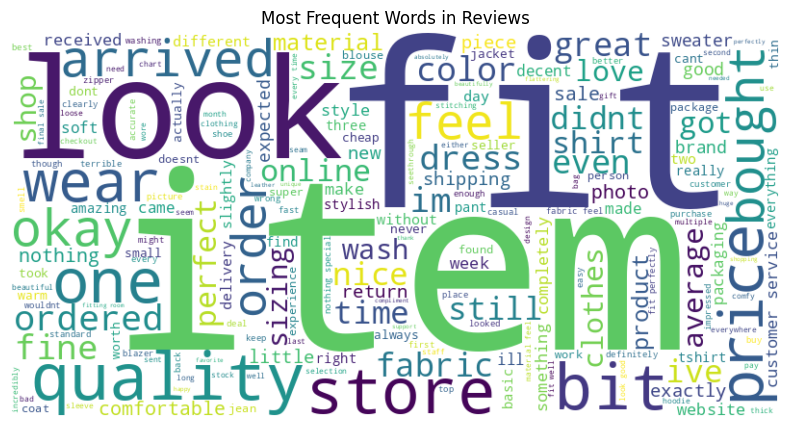

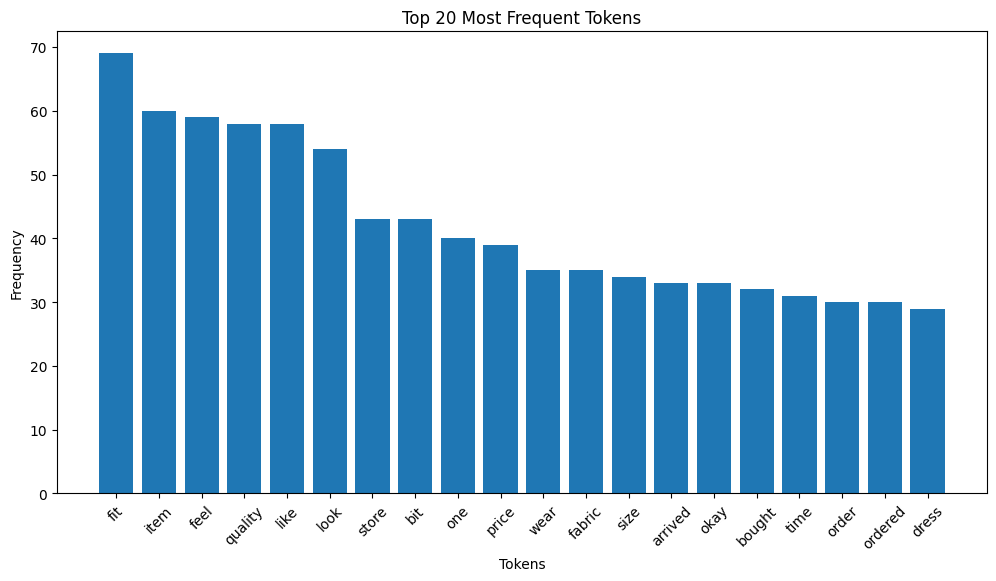

In [ ]:
# Lemmatization and tokenization were applied above for preprocessing
# Combining the cleaned text into a string
all_text = " ".join(df['cleaned_text'])

# Generating word cloud of most frequent words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Visualization for wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Reviews')
plt.show()

all_tokens = word_tokenize(all_text)
freq_dist = nltk.FreqDist(all_tokens)

# Getting the top 20 most common tokens
top_20_tokens = freq_dist.most_common(20)

# Plotting the tokens by creating DataFrame
df_freq = pd.DataFrame(top_20_tokens, columns=['Token', 'Frequency'])

# Visualization for bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_freq['Token'], df_freq['Frequency'])
plt.title('Top 20 Most Frequent Tokens')
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### MODEL BUILDING & EVALUATION

This code builds a machine learning model (Logistic Regression) to classify the sentiment of the text data. It splits the data, vectorizes the text, trains the model, and evaluates its performance.

In [ ]:
# Building Sentiment Analysis Model based on Machine Learning
# Machine Learning (Logistic Regression) - necessary for test classification


X = df['cleaned_text']
y = df['sentiment']

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF Vectorizer to converts text into a matrix of numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Building and training the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Evaluating model performance using metrics
y_pred = model.predict(X_test_tfidf)

print("--- Machine Learning Model Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

--- Machine Learning Model Results ---
Accuracy: 0.8250

Classification Report:
              precision    recall  f1-score   support

    negative       0.77      0.83      0.80        36
     neutral       0.89      0.83      0.86        41
    positive       0.81      0.81      0.81        43

    accuracy                           0.82       120
   macro avg       0.83      0.83      0.82       120
weighted avg       0.83      0.82      0.83       120



### Extension: Simple ChatBot

For the extension of the project, a simple chatbot is created whcih uses sentiment analysis model to respond to user input.

In [ ]:
# Extending NLP into a simple chatbot with the use of the same model

def respond_to_input(user_text):
    cleaned_input = preprocess_text(user_text)

    # Transforming the input using the vectorizer
    input_tfidf = tfidf_vectorizer.transform([cleaned_input])

    # Predicting Sentiment
    prediction = model.predict(input_tfidf)[0] # Get the first (and only) prediction

    # Chatbot's custom response based on sentiment
    if prediction == 'positive':
        return "That's great to hear! I'm glad you're feeling positive."
    elif prediction == 'negative':
        return "I'm sorry to hear that. I hope things get better."
    else:
        return "Thanks for sharing. I've noted that down."

print("\n--- Sentiment Chatbot ---")
print("Type 'quit' to exit.")

while True:
    user_input = input("You: ")
    if user_input.lower() == 'quit':
        break

    response = respond_to_input(user_input)
    print(f"Bot: {response}")


--- Sentiment Chatbot ---
Type 'quit' to exit.
